# Clustering Models for the Travel Review Ratings Dataset

**Report Contents**
1. Data description
2. Objective of the analysis
3. Data cleaning, EDA and insights
4. Dimensionality reduction with PCA
5. Clustering models
6. Final model
7. Findings and suggestions

### 1. Data description

The [_dataset_](http://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings) is described as follows: _This dataset is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated._

Here is the column information:
* User: Unique user id
* Category 1: Average ratings on churches
* Category 2: Average ratings on resorts
* Category 3: Average ratings on beaches
* Category 4: Average ratings on parks
* Category 5: Average ratings on theatres
* Category 6: Average ratings on museums
* Category 7: Average ratings on malls
* Category 8: Average ratings on zoo
* Category 9: Average ratings on restaurants
* Category 10: Average ratings on pubs/bars
* Category 11: Average ratings on local services
* Category 12: Average ratings on burger/pizza shops
* Category 13: Average ratings on hotels/other lodgings
* Category 14: Average ratings on juice bars
* Category 15: Average ratings on art galleries
* Category 16: Average ratings on dance clubs
* Category 17: Average ratings on swimming pools
* Category 18: Average ratings on gyms
* Category 19: Average ratings on bakeries
* Category 20: Average ratings on beauty & spas
* Category 21: Average ratings on cafes
* Category 22: Average ratings on view points
* Category 23: Average ratings on monuments
* Category 24: Average ratings on gardens

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pandasql as ps
%matplotlib inline

In [289]:
data = pd.read_csv("data/google_review_ratings.csv")
data.head().T # to see the columns clearly

,0,1,2,3,4
User,User 1,User 2,User 3,User 4,User 5
Category 1,0.0,0.0,0.0,0.0,0.0
Category 2,0.0,0.0,0.0,0.5,0.0
Category 3,3.63,3.63,3.63,3.63,3.63
Category 4,3.65,3.65,3.63,3.63,3.63
Category 5,5.0,5.0,5.0,5.0,5.0
Category 6,2.92,2.92,2.92,2.92,2.92
Category 7,5.0,5.0,5.0,5.0,5.0
Category 8,2.35,2.64,2.64,2.35,2.64
Category 9,2.33,2.33,2.33,2.33,2.33


In [290]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.205854,1.192804,0.949192,0.823140,0.969707,1.000176,0.965838,1.750537,1.531008,1.560662
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715611,1.107004,0.973535,0.949592,1.203646,1.194216,0.929853,1.598734,1.316126,1.171672
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

### 2. Objective of the analysis

The goal of this work is to identify potential segmentations of the reviewers. Several clustering algorithms will be used to create an ideal model.

### 3. Data cleaning, EDA and insights

As the information states, there are 5456 non-null rows in the data described by 25 columns. Since the column _User_ identifies the ID of each user, it will be dropped.

In [292]:
data = data.drop(columns="User", axis=1)
data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Now, let's look at the correlation heatmap to recognize relationships between the features.

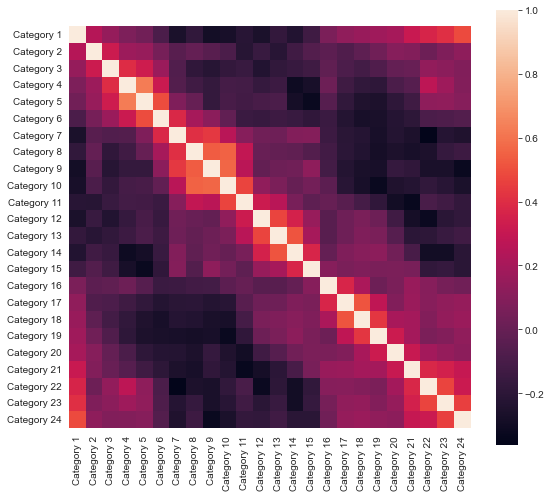

In [293]:
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax=ax, square=True);

Now, let's look at the boxplots of the categories.

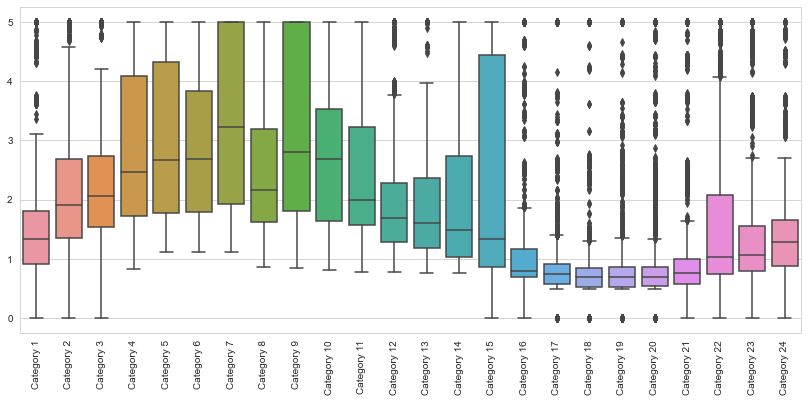

In [294]:
plt.figure(figsize=(14, 6))
fig = sns.boxplot(data=data)
fig.tick_params(axis='x', rotation=90)

Correlation and skewness seem to exist. Therefore, Principal Component Analysis (PCA) for feature extraction can be used to eliminate noise and reduce the dimensionality of the data.

### 4. Dimensionality reduction with PCA

Let's start with constructing the correlation matrix.

In [295]:
for x in range(corrmat.shape[0]):
    corrmat.iloc[x,x] = 0.0
corrmat

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
Category 1,0.000000,0.248991,0.148805,0.070692,0.035451,-0.093143,-0.264632,-0.181267,-0.290214,-0.274683,...,-0.135070,0.067286,0.130095,0.160311,0.180293,0.199370,0.309238,0.364375,0.407165,0.489280
Category 2,0.248991,0.000000,0.325011,0.167338,0.153520,0.053916,-0.050158,-0.004500,-0.050550,-0.092526,...,-0.066495,-0.033120,-0.077141,-0.025745,0.032577,0.096908,0.088990,0.018366,0.077813,0.125230
Category 3,0.148805,0.325011,0.000000,0.396786,0.329925,0.161242,-0.072713,-0.186308,-0.219842,-0.179090,...,-0.133885,-0.022251,-0.084634,-0.120228,-0.075351,-0.009271,0.001105,0.134571,0.117805,0.082471
Category 4,0.070692,0.167338,0.396786,0.000000,0.626868,0.315354,-0.067914,-0.128064,-0.169442,-0.115515,...,-0.271652,0.018270,-0.132454,-0.184497,-0.192606,-0.092540,-0.056226,0.276727,0.174082,0.090498
Category 5,0.035451,0.153520,0.329925,0.626868,0.000000,0.489937,0.077807,-0.002595,-0.170430,-0.100191,...,-0.323393,-0.056352,-0.184329,-0.243976,-0.256937,-0.192064,-0.133433,0.124431,0.128594,0.098704
Category 6,-0.093143,0.053916,0.161242,0.315354,0.489937,0.000000,0.382774,0.200528,0.114719,-0.019007,...,-0.186981,-0.149299,-0.229589,-0.271913,-0.266562,-0.227419,-0.197454,-0.090481,-0.080696,-0.066542
Category 7,-0.264632,-0.050158,-0.072713,-0.067914,0.077807,0.382774,0.000000,0.406959,0.432054,0.256563,...,0.093165,-0.142866,-0.207259,-0.227205,-0.272925,-0.232474,-0.257728,-0.360287,-0.222708,-0.247630
Category 8,-0.181267,-0.004500,-0.186308,-0.128064,-0.002595,0.200528,0.406959,0.000000,0.536870,0.551409,...,-0.064189,-0.124421,-0.202936,-0.236631,-0.280987,-0.254432,-0.274733,-0.255520,-0.167607,-0.137234
Category 9,-0.290214,-0.050550,-0.219842,-0.169442,-0.170430,0.114719,0.432054,0.536870,0.000000,0.564086,...,0.127220,-0.119848,-0.229572,-0.267093,-0.271856,-0.164087,-0.185958,-0.268053,-0.268087,-0.326462
Category 10,-0.274683,-0.092526,-0.179090,-0.115515,-0.100191,-0.019007,0.256563,0.551409,0.564086,0.000000,...,0.038727,-0.031932,-0.212329,-0.274511,-0.324071,-0.247568,-0.230389,-0.183660,-0.212640,-0.263571


There are several positive and negative correlations between the features. Now, let's construct the principal components and plot the explained variance.

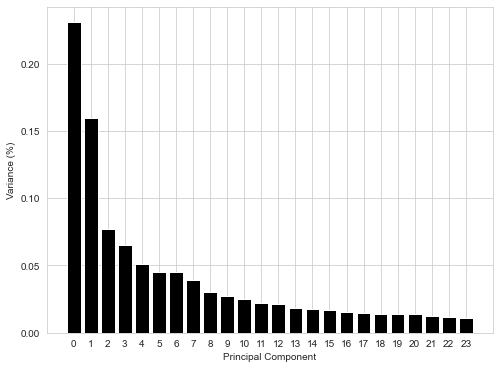

In [296]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# log transform for skewed features
log_transformer = FunctionTransformer(np.log1p)
# technically, columns take the values within the same range of floats of 0 to 5, however, scaling will not hurt the analysis
estimators = [('log1p', log_transformer), ('ss', StandardScaler())]
pipeline = Pipeline(estimators)

data_pipe = pipeline.fit_transform(data)

pca = PCA(n_components=24)
principalComponents = pca.fit_transform(data_pipe)

compns = range(pca.n_components_)
plt.figure(figsize=(8, 6))
plt.bar(compns, pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)')
plt.xticks(compns)

PCA_components = pd.DataFrame(principalComponents)

Let's secure 80% explained variance.

In [297]:
pca.explained_variance_ratio_.cumsum()

array([0.23070835, 0.39020467, 0.46744069, 0.53237685, 0.58352293,
       0.62861222, 0.67363921, 0.71284439, 0.74345194, 0.77071705,
       0.79606279, 0.81796404, 0.83902411, 0.85715432, 0.87480385,
       0.89186337, 0.9075681 , 0.92261449, 0.93689393, 0.95101496,
       0.96475551, 0.97700822, 0.9889761 , 1.        ])

The first 12 components can be used instead of using all the features in the dataset. The number of dimensions is reduced by 50%, which means that it will be now easier to fit clustering models since they are heavily based on distances.

### 5. Clustering models

#### 5.1. K-means

First let's try to determine the number of clusters via evaluating inertias of several K-means models with different number of clusters.


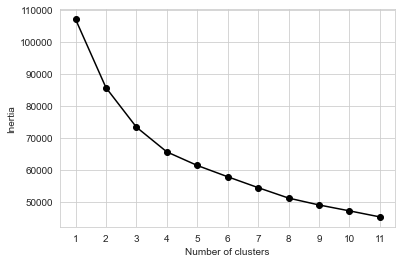

In [298]:
from sklearn.cluster import KMeans
cl_list = range(1, 12)
inertia_list = []
for k in cl_list:
    pipe = [
        ('pca', PCA(n_components=12)),
        ('clustering', KMeans(n_clusters=k))
    ]
    pipe = Pipeline(pipe)
    pipe.fit(data_pipe)
    inertia_list.append(pipe[1].inertia_)

plt.plot(cl_list, inertia_list, '-o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cl_list)
plt.show()

The elbow point can be considered as 4 clusters. Let's use the model with 4 clusters.

In [299]:
pipe = [
        ('pca', PCA(n_components=12)),
        ('clustering', KMeans(n_clusters=4))]
km_pipe = Pipeline(pipe)
km_pipe.fit(data_pipe)
data['kmeans'] = km_pipe.predict(data_pipe)
data['kmeans'].unique()

array([2, 1, 0, 3])

To interpret the clusters, the average rating per category by these clusters can be examined. It is aimed to distinguish the interest of users for different categories.

In [300]:
avg_ratings = []
for k in range(4): # 4 clusters
    ratings = []
    dat = data[data["kmeans"] == k]
    for c in range(24): # 24 categories
        r = dat[f"Category {c+1}"].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings.append(ratings)
df = pd.DataFrame.from_records(avg_ratings)
df.columns = data.columns
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,kmeans
0,0.645016,0.958980,1.744211,1.566020,1.609868,1.659523,3.042714,2.004720,3.052253,3.127747,...,0.915049,0.841826,0.925115,1.256760,0.994359,0.580510,0.568454,0.525148,0.622632,0
1,1.500916,2.687973,3.262523,3.969017,4.239739,3.611489,3.277201,2.247108,2.689642,2.473234,...,1.080358,0.728925,0.556018,0.647236,0.799140,0.867334,2.223649,1.859652,1.691617,1
2,1.203390,2.229651,1.964088,2.280767,2.556531,3.098144,4.240344,3.517102,4.299915,3.735331,...,1.045912,0.670862,0.501074,0.528530,0.637224,0.702226,1.105854,1.018049,1.186335,2
3,2.334835,2.596899,2.424975,2.232582,2.040209,1.856879,2.007079,1.597228,1.807667,1.652532,...,1.857178,1.968136,1.888923,2.255693,2.079641,1.888315,2.760847,2.467597,2.579890,3


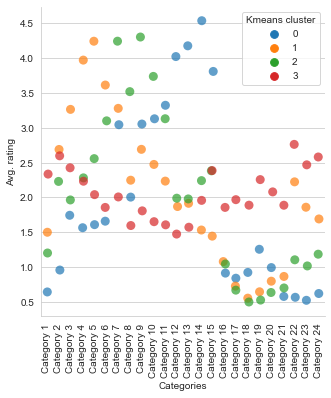

In [301]:
dfm = df.melt('kmeans', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='kmeans', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Kmeans cluster")
plt.show()

Since there are several categories, it is impossible to visualize the clusters. However, from the average ratings, it can be said that users belonging to different clusters have different pick-points in different categories (clusters 0, 1, 3). One of the clusters (cluster 2) have kind of a more-balanced average ratings compared to the others.

Number of clusters are assumed to be 4 at this point since the elbow analysis is used. The following models will be used with the same number of clusters to be able to compare them accurately.

#### 5.2. Agglomerative clustering

Let's try Agglomerative Clustering with ward linkage and 4 as the number of clusters again, to be able to compare the clusters with the results of K-means.

In [302]:
from sklearn.cluster import AgglomerativeClustering
pipe = [
        ('pca', PCA(n_components=12)),
        ('clustering', AgglomerativeClustering(n_clusters=4))]
agg_pipe = Pipeline(pipe)
data["ward"] = agg_pipe.fit_predict(data_pipe)
data["ward"].unique()

array([0, 3, 2, 1], dtype=int64)

The same steps of interpreting average ratings among the clusters will be followed again.

In [303]:
avg_ratings = []
for k in range(4): # 4 clusters
    ratings = []
    dat = data[data["ward"] == k]
    for c in range(24): # 24 categories
        r = dat[f"Category {c+1}"].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings.append(ratings)
df_2 = pd.DataFrame.from_records(avg_ratings)
df_2.columns = data.drop(columns="kmeans").columns
df_2

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,ward
0,1.399560,2.483157,2.730652,3.328496,3.805143,3.655310,3.824836,2.568629,3.004466,2.623228,...,1.391487,0.963473,0.730386,0.672684,0.648936,0.767121,1.447869,1.441845,1.536215,0
1,2.124936,2.791095,2.982956,2.956947,2.647014,2.173721,2.053136,1.624561,2.062813,1.822303,...,1.328335,1.236377,1.278275,1.808957,2.003586,1.743878,3.216219,2.504801,2.360278,1
2,0.639886,0.940209,1.554563,1.538707,1.594297,1.590589,2.889030,2.027357,2.799240,3.061673,...,0.811141,0.868992,0.940494,1.307738,0.986825,0.526008,0.514297,0.494867,0.620247,2
3,1.180294,2.070824,1.861454,2.098445,2.199941,2.734731,4.052412,3.737782,4.707294,4.287134,...,0.807815,0.634059,0.449050,0.480975,0.592538,0.690655,1.267370,1.078538,1.130084,3


In [304]:
np.allclose(df, df_2) # to check if the values inside the dataframes are equivalent

False

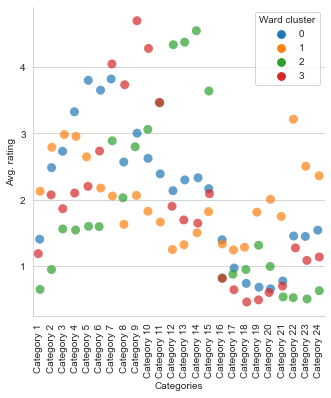

In [305]:
dfm_2 = df_2.melt('ward', var_name='Categories', value_name='Avg. rating')
p = sns.catplot(x="Categories", y="Avg. rating", hue='ward', data=dfm_2, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Ward cluster")
plt.show()

#### 5.3. Spectral clustering

Let's try Spectral clustering this time, with 4 as the total number of clusters.

In [306]:
from sklearn.cluster import SpectralClustering
pipe = [('pca', PCA(n_components=12)),
        ('clustering', SpectralClustering(n_clusters=4))]
sp_pipe = Pipeline(pipe)
data["spec"] = sp_pipe.fit_predict(data_pipe)
data["spec"].unique()

array([0, 3, 1, 2])

In [307]:
avg_ratings = []
for k in range(4): # 4 clusters
    ratings = []
    dat = data[data["spec"] == k]
    for c in range(24): # 24 categories
        r = dat[f"Category {c+1}"].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings.append(ratings)
df_3 = pd.DataFrame.from_records(avg_ratings)
df_3.columns = data.drop(columns={"kmeans", "ward"}).columns
df_3

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,spec
0,1.280525,2.290282,2.530516,2.943687,3.171207,3.128486,3.627532,2.732980,3.421453,3.078469,...,1.005392,0.715057,0.591303,0.716738,0.817288,0.771122,1.579528,1.344999,1.333979,0
1,0.000000,0.527273,0.524545,3.668182,2.954545,2.940000,2.940000,2.834545,1.709091,2.308182,...,0.601818,0.541818,0.000000,0.000000,0.339091,0.000000,0.000000,0.000000,0.000000,1
2,2.294943,2.457088,2.309617,2.100342,1.966663,1.803472,2.074653,1.645430,1.780518,1.701772,...,2.072528,2.044953,1.913109,2.158808,1.861047,1.886404,2.575855,2.421762,2.640497,2
3,0.000000,5.000000,4.034286,3.645714,4.120000,2.924286,3.554286,2.705714,2.057143,2.540000,...,0.601429,0.142857,0.000000,0.214286,0.227143,0.000000,0.000000,0.000000,0.000000,3


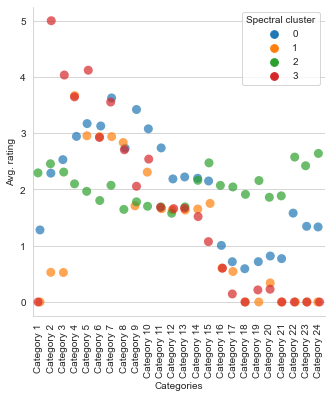

In [308]:
dfm_3 = df_3.melt('spec', var_name='Categories', value_name='Avg. rating')
p = sns.catplot(x="Categories", y="Avg. rating", hue='spec', data=dfm_3, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Spectral cluster")
plt.show()

Average ratings among different clusters seems to have different patterns for all the models. The clustering models will be compared in the next section.

### Final model

First, the models are compared according to their Calinski-Harabasz Indexes (a.k.a. variance-ratio criterion) since it is known to be a great indicator of the performance of a clustering algorithm, and it does not require information on the ground truth labels. The higher the ratio, the better the performance.

In [309]:
from sklearn.metrics import calinski_harabasz_score as chz
print(f"The Calinski-Harabasz Indexes:")
score_kmeans = chz(data_pipe, data["kmeans"])
score_ward = chz(data_pipe, data["ward"])
score_spec = chz(data_pipe, data["spec"])
print(f"For K-means: {score_kmeans}")
print(f"For Aggloremative clustering: {score_ward}")
print(f"For Spectral clustering: {score_spec}")

The Calinski-Harabasz Indexes:
For K-means: 845.0133386683867
For Aggloremative clustering: 713.9543840037027
For Spectral clustering: 294.4497720329767


As a second evaluation metric for clustering, Davies-Bouldin Index is used. This metric measures the average similarity of each cluster with its most similar cluster, and it does not require information on the ground truth labels. In this case, the lower values indicate better clustering.

In [310]:
from sklearn.metrics import  davies_bouldin_score as dbs
print(f"The Davies-Bouldin Indexes:")
score_kmeans = dbs(data_pipe, data["kmeans"])
score_ward = dbs(data_pipe, data["ward"])
score_spec = dbs(data_pipe, data["spec"])
print(f"For K-means: {score_kmeans}")
print(f"For Aggloremative clustering: {score_ward}")
print(f"For Spectral clustering: {score_spec}")

The Davies-Bouldin Indexes:
For K-means: 2.1097402832922234
For Aggloremative clustering: 2.229565907832947
For Spectral clustering: 1.396677384509906


In terms of dense and well-seperated clusters, K-means outperformed the other methods. In terms of "similarity" between the clusters, Spectral clustering seems to have more distinguished clusters compared to the other models.

Since Calinski-Harabasz index relates more to the standard concept of the clusters, this metric will be used while recommending the final model. It can be concluded that with 4 clusters, K-means algorithm performed the best in terms of the variance-ratio criterion. Therefore, the recommended model is K-means.

### 7. Findings and suggestions

The data consists of only numerical columns, which made it even easier to apply PCA. The "potential" number of clusters is first determined according to K-means. Three different clustering methods are used in this analysis, and it is assumed that the number of clusters is known. According to the Calinski-Harabasz indexes of these models, K-means outperformed the others.

This study can be extended by including other models to determine the number of clusters (e.g. tuning a DBSCAN). Since the ground truth is unknown, it is preferred to tune K-means, which only has one essential parameter. For the future models, it is also suggested having more observations as it may help to identify different patterns in ratings.

_by Sude Kocaçiftçi Bayraktar_